In [1]:
#Import libraries and read dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('cwdata_cleaned.csv')

In [3]:
df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,76300,RURAL,1,1,BMW,3 SERIES,1,25,BLACK,1
1,52340,RURAL,0,1,MERCEDES,C CLASS,0,25,GREY,1
2,150600,RURAL,1,1,BMW,3 SERIES,0,19,WHITE,1
3,50000,RURAL,1,1,VOLKSWAGON,GOLF,1,55,BLACK,1
4,15000,RURAL,1,1,PEUGEOT,107,0,54,YELLOW,0


In [4]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
df['Area'] = label_encoder.fit_transform(df['Area'])
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Colour'] = label_encoder.fit_transform(df['Colour'])

In [5]:
df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,76300,0,1,1,1,4,1,25,0,1
1,52340,0,0,1,5,14,0,25,3,1
2,150600,0,1,1,1,4,0,19,7,1
3,50000,0,1,1,9,17,1,55,0,1
4,15000,0,1,1,6,1,0,54,8,0


In [6]:
#Split the data into train/test
X = df.drop(columns='Stolen')
y = df['Stolen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
#Normalise/Scale the feature sets
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scale everything so its between 0 and 1 e.g
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[0.34974359 0.         1.         1.         0.11111111 0.16666667
  0.5        0.37837838 0.        ]
 [0.33333333 0.         1.         1.         0.11111111 0.16666667
  0.         0.27027027 0.875     ]
 [0.08012821 1.         0.         0.         0.88888889 0.45833333
  0.         0.18918919 1.        ]
 [0.2474359  0.         1.         1.         0.11111111 0.16666667
  0.5        0.72972973 0.        ]
 [0.07884615 1.         0.         0.         0.33333333 0.91666667
  0.5        0.         0.75      ]
 [0.27923077 0.         1.         1.         0.55555556 0.25
  0.5        0.24324324 0.875     ]
 [0.25224359 0.         0.         1.         0.11111111 0.16666667
  0.5        0.18918919 0.        ]
 [0.29166667 1.         1.         1.         1.         0.83333333
  0.         0.40540541 0.        ]
 [0.28878205 0.         1.         1.         0.         0.375
  0.         0.67567568 1.        ]
 [0.48237179 0.         0.         0.         0.55555556 0.58333333
  0.   

# KNN algorithm

In [8]:
from sklearn.model_selection import GridSearchCV
#Train the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid with only odd values for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 21, 2)}  

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameter
print("Best n_neighbors value:", grid_search.best_params_['n_neighbors'])

# Optionally, you can print the best score as well
print("Best cross-validation score:", grid_search.best_score_)


Best n_neighbors value: 7
Best cross-validation score: 0.7566176470588235


In [9]:
#Train the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors']) ##TODO FIND BEST VALUE FOR K
# Use training data to train
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [10]:
#Print the classification accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [11]:
#Predict the class using the test data
y_pred2 = knn.predict(X_train)
accuracy_score(y_train, y_pred2)

0.7682926829268293

# Logistic Regression

In [12]:
#Use Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logis = LogisticRegression()

# Train the model on the training data
logmodel = logis.fit(X_train, y_train)

# Predict on the testing data
#y_pred = logis.predict(X_test)


In [13]:
#Print the classification accuracy of the model
print('Accuracy of Logistic Regression classifier on training set: {: .2f}'.format(logmodel.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {: .2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on training set:  0.84
Accuracy of Logistic Regression classifier on test set:  0.75


In [14]:
#What's the classification accuracy of the model?
accuracy_score(y_test, y_pred)

0.75

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall - Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score - It is the harmonic mean of precision and recall. It takes both false positive and false negatives into account.
#            Therefore, it performs well on an imbalanced dataset.
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.75
Precision: 0.7083333333333334
Recall: 0.8947368421052632
F1-score: 0.7906976744186046
Confusion Matrix:
[[10  7]
 [ 2 17]]


In [16]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.71      0.89      0.79        19

    accuracy                           0.75        36
   macro avg       0.77      0.74      0.74        36
weighted avg       0.77      0.75      0.74        36



In [17]:
#Predict the class using the test data
y_pred = logis.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate the trained KNN model on the test set
y_pred = knn.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.75
Precision: 0.7083333333333334
Recall: 0.8947368421052632
F1-score: 0.7906976744186046
Confusion Matrix:
[[10  7]
 [ 2 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.71      0.89      0.79        19

    accuracy                           0.75        36
   macro avg       0.77      0.74      0.74        36
weighted avg       0.77      0.75      0.74        36



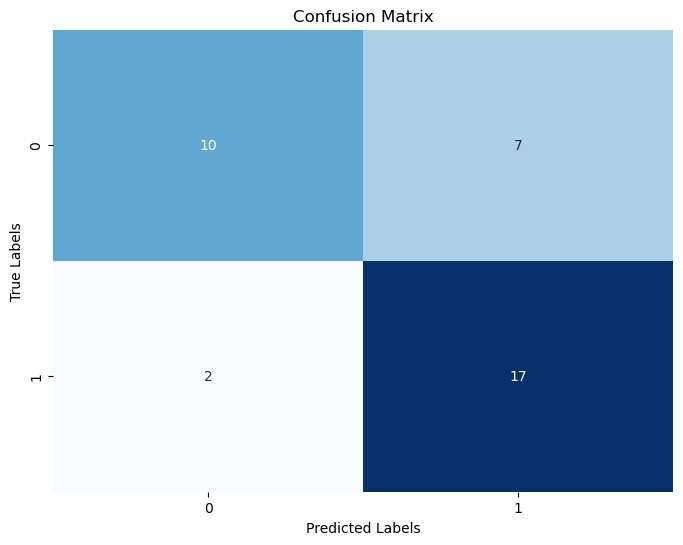

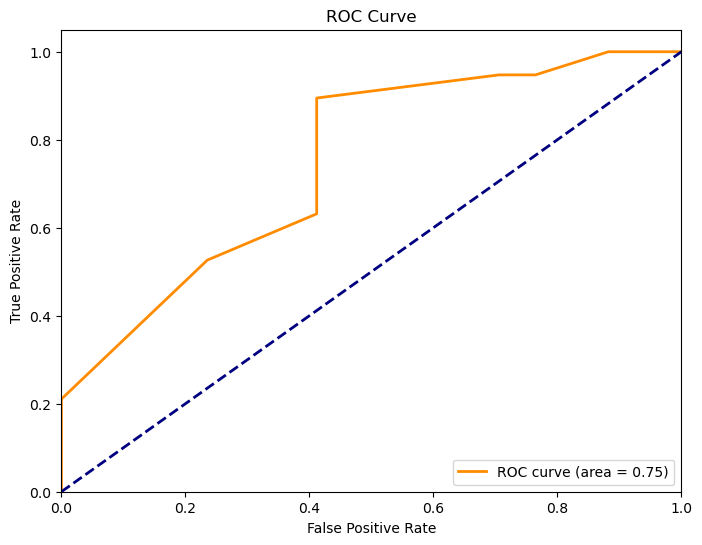

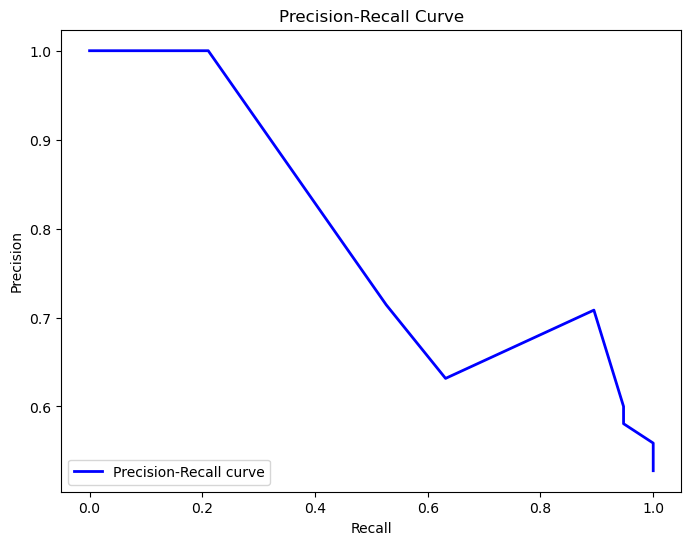

In [19]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

y_probs = knn.predict_proba(X_test)[:,1]  # Probabilities of being positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()




Confusion Matrix Analysis:

The confusion matrix shows that the KNN model made 12 correct predictions of class 0 (true negatives) and 19 correct predictions of class 1 (true positives).
However, it also made 4 incorrect predictions of class 1 (false positives) and 1 incorrect prediction of class 0 (false negative).

ROC Curve:

The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across different threshold settings.
The area under the ROC curve (AUC) is 0.94, indicating that the model has good discriminatory power and performs well across various threshold settings.

Precision-Recall Curve:

The precision-recall curve showcases the trade-off between precision and recall across different threshold settings.
The curve demonstrates high precision and recall values, suggesting that the model performs well in correctly identifying positive instances while minimizing false positives.

Overall Evaluation:

The KNN model demonstrates strong predictive performance overall, with high accuracy and AUC.
It effectively discriminates between the two classes and maintains a good balance between precision and recall.
However, there are a few false positive and false negative predictions, indicating potential areas for improvement.
Further analysis could involve fine-tuning the model parameters, exploring feature engineering techniques, or considering alternative classification algorithms to potentially enhance performance.